# Aula 10 - Extração de dados de fontes remotas para visualização e análise

<center>
<img src="https://oestatistico.com.br/wp-content/uploads/2016/06/Structured-Data.jpg" alt="drawing" width="500px"></center>

**Intrutora:** Patrícia Pampanelli (@patriciapampanelli no Slack)

**Experiência:**
- Cientista da Computação (UFJF)
- Mestre em Modelagem Computacional (UFJF)
- Doutora em Processamento de Imagens e Visão Computacional (PUC-Rio)
- Sênior Data Scientist - Grupo ZAP


**Interesses:**
- Carros Autônomos <img src="https://cdn1.iconfinder.com/data/icons/transportation-vehicles-2/128/self-driving-car-g-radar-512.png" alt="drawing" width="80px"> 
- Visão Computacional <img src="https://static.thenounproject.com/png/1119966-200.png" alt="drawing" width="80px">
- Processamento de Linguagem Natural <img src="https://upload.wikimedia.org/wikipedia/en/thumb/1/11/Fast_text.png/800px-Fast_text.png" alt="drawing" width="80px">
- Intelligent Video Analytics <img src="https://image.freepik.com/iconen-gratis/videocamera-symbool_318-40225.jpg" alt="drawing" width="80px">

# O que é uma API?

<center>
<video controls src="whats-is-an-api.mp4" size=10/></center>
Link: https://www.youtube.com/watch?v=s7wmiS2mSXY

# Como são formadas as APIs REST

Podemos dizer que uma API é como se fosse uma página da web só que para computadores. Só eles conseguirem acessar, ler e interagir da maneira adequada com as APIs.

Como Data Scientists, vocês utilizarão APIs tanto internas (fornecidas pelas próprias empresas em que vocês trabalham) quanto externas.

APIs são uma das principais formas que um Data Scientist utiliza para obter os dados que devem ser analisados.

<center>
<img src="https://cdn-images-1.medium.com/max/1600/1*CkynRe-J1FVnUAk7JmOTdQ.gif" alt="drawing" width="600px"></center>

Como exemplo, ao acessarmos a API da Jsonplaceholder https://jsonplaceholder.typicode.com/posts/1, vemos o retorno abaixo, ao invés de uma página comum:

```python
{
  "userId": 1,
  "id": 1,
  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
  "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
}
```

Esse padrão de resposta é o que chamamos de JSON (*JavaScript Object Notation - Notação de Objetos JavaScript*), e este é o tipo de resposta mais comum entre as APIs.

Ele foi feito para que máquinas entendam seus dados e os utilizem como quiser.

# Como funciona o protocolo HTTP

A internet trafega através do protocolo **HTTP (*Hypertext Transfer Protocol*)**. O protocolo HTTP foi criado por **Tim Berners-Lee**, o criador da web, enquanto ele trabalhava na CERN em 1989 (sua equipe e ele também foram responsáveis pelo HTML).

O HTTP possui duas entidades básicas: a **Request (pedido)** e a **Response (resposta)**

Sempre que entramos em uma página, enviamos uma request para o servidor do site e esperamos uma response com o HTML da página.

Sempre que enviamos um ***Request (pedido)*** devemos especificar um método. A tabela abaixo cita os métodos mais comuns e explica brevemente o objetivo de cada um:

| Método |        Objetivo       |
|:------:|:---------------------:|
| GET    | Obter informações     |
| POST   | Salvar informações    |
| PUT    | Atualizar informações |
| DELETE | Deletar informações   |

Todos eles são comumente utilizados por APIs.

O método ***GET*** é o que seu navegador usa para baixar o HTML da página.

O metódo ***POST*** também é muito utilizado sempre que você envia algum formulário em um site.

Além do método, as requisições também possuem um **header**:

O **Header (cabeçalho)** tem a função de dizer para o servidor diversos dados sobre quem fez a solicitação. Dessa forma, o servidor consegue até permitir que você veja mais informações dependendo do seu nível de acesso.

Todos as respostas possuem, além do conteúdo da resposta, um código de status.

Os códigos de status (status code) seguem um padrão.

Os mais comuns são:

| Código |                                    Significado                                    |
|:------:|:---------------------------------------------------------------------------------:|
| 200    | Ok                                                                                |
| 3XX    | O servidor vai te redirecionar para outra URL                                     |
| 4XX    | O recurso não foi encontrado, não está mais disponível, etc                       |
| 5XX    | Algum problema aconteceu no servidor e ele não conseguiu processar a sua request  |

Outra característica das APIs REST é a **divisão dos recursos**. Por exemplo:

https://jsonplaceholder.typicode.com/users/1

Ao abrirmos esta URL estamos fazendo um GET para obtermos informações do usuário (/users) com código 1 (/1). Podemos trocar o código do usuário para buscar outros usuários.

Também podemos pedir todos os usuários digitando:

https://jsonplaceholder.typicode.com/users


Também é muito comum o uso de parâmetros na URL para passarmos **filtros para a API**. Por exemplo:

https://jsonplaceholder.typicode.com/comments?postId=1

Perceba o **"?postId=1"** ao final da URL.

Sempre que precisamos passar parâmetros, começamos com um ponto de interrogação (?) e depois utilizamos o & para parâmetros futuros. Por exemplo:

https://jsonplaceholder.typicode.com/comments?postId=1&id=3

# Como funciona o pacote Requests

Como vimos anteriormente, o pacote requests do Python é utilizado para nos comunicarmos com URLs.

Podemos realizar GET, POST, PUT, DELETE e quaisquer outros métodos HTTP com ele.

In [3]:
# Veja no exemplo abaixo como podemos fazer isso:

import requests

api = requests.get('https://jsonplaceholder.typicode.com/comments?postId=1&id=3')

json = api.json()
print(json)
#for user in json:
#    print('{0} ({1}) - {2}'.format(user['name'], user['email'], user['website']))

[{'postId': 1, 'id': 3, 'name': 'odio adipisci rerum aut animi', 'email': 'Nikita@garfield.biz', 'body': 'quia molestiae reprehenderit quasi aspernatur\naut expedita occaecati aliquam eveniet laudantium\nomnis quibusdam delectus saepe quia accusamus maiores nam est\ncum et ducimus et vero voluptates excepturi deleniti ratione'}]


# Exercício - Extraindo Dados do CoinMarketCap via API

Vamos usar o pacote requests para o acessar a API do CoinMarketCap.

As instruções da API estão disponíveis em: https://coinmarketcap.com/api/

Deveremos extrair os seguintes dados:

- Nome da moeda
- Preço atual CONVERTIDO EM REAIS
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas
- Também deveremos limitar para que a API traga apenas 5 moedas para trabalharmos

*Tempo: 10 minutos*

In [ ]:
import requests

api = requests.get('API')

json = api.json()

for moeda in json:
    nome = 'moed'
    preco = '$222'
    valor_mercado = '$555' 
    em_circulacao = '46465'
    percentual_dia = '1.56%'
    print('{0}: {1} ({2} / 24h)'.format(nome, preco, percentual_dia))
    print('Em circulação: {0}'.format(em_circulacao))
    print('Valor de mercado: {0}'.format(valor_mercado))
    print('-------------')

In [ ]:
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL&limit=5')

json = api.json()

for moeda in json:
    nome = moeda['name']
    preco = moeda['price_brl']
    valor_mercado = moeda['market_cap_brl']
    em_circulacao = moeda['available_supply']
    percentual_dia = moeda['percent_change_24h']
    print('{0}: {1} ({2} / 24h)'.format(nome, preco, percentual_dia))
    print('Em circulação: {0}'.format(em_circulacao))
    print('Valor de mercado: {0}'.format(valor_mercado))
    print('-------------')

# Como utilizar APIs com autenticação

É muito comum encontrarmos APIs que necessitam de autenticação. Isto é, algum identificador que diz para ela quem está requisitando aquela informação.

Para realizarmos autenticação em APIs REST nós normalmente utilizamos um Header e um Token de acesso.

Porém, algumas APIs também utilizam parâmetros para realizar a autenticação.

Abaixo vamos ver como acessar a API da Battuta (https://battuta.medunes.net/) utilizando um token.

A Battuta é um serviço para dados geográficos.

*Aviso para leitores do futuro: se essa key não funcionar, é só entrar no site da battuta e gerar uma nova digitando o seu e-mail.*

In [7]:
import  requests

payload = {'key': 'ce46369940c2632e9c160b0474bf49a3'}

api = requests.get('http://battuta.medunes.net/api/country/all/')

json = api.json()

print(json)

for country in json:
    print('{0} ({1})'.format(country['name'], country['code']))

{'error': 'Missing API key. Please visit battuta.medunes.net to get an API key. Also read the documentation for more information.'}


TypeError: string indices must be integers

Como você pode ver, utilizamos uma váriavel com todos os parâmetros que gostaríamos de passar.

O pacote *requests* do python colocou automaticamente o ponto de interrogação na URL para você!

In [ ]:
# Caso você se depare com uma API que utilize Headers, basta utilizar o exemplo abaixo como base.

import requests

h = {'my-custom-header': 'i am the one who knocks'}

r = requests.get('http://battuta.medunes.net/api/country/all/?key=ce46369940c2632e9c160b0474bf49a3', headers=h)

json = r.json()

for country in json:
    print('{0} ({1})'.format(country['name'], country['code']))

# Escrita e leitura de arquivos em Python

Em Python, assim como em outras linguagens de programação, podemos manipular arquivos que estão em nosso disco.

Para isso, utilizamos o open para nos trazer um objeto de arquivo.

O open precisa saber o nome do arquivo para conseguir ler seu conteúdo:

```python
open("nome_do_arquivo")
```

No entanto, existe um segundo argumento que podemos passar para dizer qual o modo que queremos trabalhar com esse arquivo.

Abaixo podemos ver exemplos de códigos com os modos mais comuns:

```python
open('nome_do_arquivo', 'r')  #Apenas leitura - padrão quando o modo é omitido

open('nome_do_arquivo', 'r+') #Leitura e escrita

open('nome_do_arquivo', 'w')  #Apenas escrita, apaga tudo que tem no arquivo antes de escrever novamente

open('nome_do_arquivo', 'a')  #"Append", adiciona o que você quiser ao final do arquivo, sem apagar nada
```

Também existe um argumento para passarmos em qual encoding gostaríamos de escrever.

```python
open('nome_do_arquivo', 'w', encoding='utf-8')
```

Você pode conferir todos os parâmetros do método open aqui: https://docs.python.org/3/library/functions.html#open

Todo o processo de escrita e leitura de arquivos deve ser feita com muito cuidado. Como são operações mais lentas, você pode acabar travando seu computador se fizer um loop errado enquanto escreve um arquivo.

Por isso, é muito importante se lembrar de SEMPRE fechar o arquivo após o uso dele no Python.

Vamos ver um exemplo:

```python
f = open('arquivo_teste.txt', 'w')

f.write('Alô? Alguém me escuta?')

f.close()
```


# Porque o Context Manager (with) é necessário

Em Python, podemos pedir ajuda de um Context Manager para automaticamente fechar o arquivo após o uso.

Isso é a recomendação das boas práticas e evita que seu código tenha bugs.

Para utilizarmos essa funcionalidade, basta utilizar a palavra reservada with

Vamos ver um exemplo:

```python
with open(('arquivo_teste.txt''arquivo , 'r') as f:
    print(f.readline())

print('\n\nSerá que o arquivo está fechado? {0}'.format(f.closed))
```


# O que é um arquivo CSV (*Comma-separated values*)

Arquivos CSV são apenas uma coleção de dados separados por um caractere especial (normalmente , ou ;).

Eles são muito importantes para fazer movimentações de dados de um lugar para o outro.

Todos os softwares de planilha do mercado aceitam arquivos CSV.

Alguns cuidados que devemos seguir ao criar um arquivo CSV:

- Sempre terminar as linhas com **\n**
- Sempre utilizar o encoding como **utf-8**
- Utilizar caracteres que não influenciam no dado (ex.: vírgulas para separar dados númericos que também usam vírgulas)

Vamos ver um exemplo de como podemos criar um arquivo CSV em Python a partir do scraping da API do Jsonplaceholder.

In [ ]:
import requests

api = requests.get('https://jsonplaceholder.typicode.com/users')

json = api.json()

with open('lista_de_usuarios.csv', 'w', encoding='utf-8') as f:
    for user in json:
        f.write('{0};{1};{2}\n'.format(user['name'], user['email'], user['website']))

        
# Vamos ler nosso arquivo
with open('lista_de_usuarios.csv', 'r') as r:
    for line in r:
        print(line)

# Exercício - CSV com os dados do CoinMarketCap

Vamos usar o pacote requests para o acessar a API do CoinMarketCap e em seguida gravar o retorno em um CSV.

As instruções da API estão disponíveis em: https://coinmarketcap.com/api/

Deveremos extrair os seguintes dados:

- Nome da moeda
- Preço atual CONVERTIDO EM REAIS
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas
- Não precisaremos limitar a quantidade de moedas para esse exercício

*Tempo: 10 minutos*

In [ ]:
import requests

api = requests.get('API')

json = api.json()

# TODO - Abrir arquivo 

# TODO - Escrever em padrão CSV

# TODO - Ler novamento o arquivo salvo e imprimir

In [ ]:
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')

json = api.json()

# Abrir arquivo 
with open('lista_de_usuarios.csv', 'w', encoding='utf-8') as f:
    for moeda in json:
        nome = moeda['name']
        preco = moeda['price_brl']
        valor_mercado = moeda['market_cap_brl']
        em_circulacao = moeda['available_supply']
        percentual_dia = moeda['percent_change_24h']
        
        # Escrever em padrão CSV
        f.write('{0};{1};{2};{3};{4}\n'.format(nome, preco, valor_mercado, em_circulacao, percentual_dia))

        
# Ler novamento o arquivo salvo e imprimir
with open('lista_de_usuarios.csv', 'r') as r:
    for line in r:
        print(line)

# Nós temos os dados! E agora?

<center>
<img src="http://www.comregras.com/wp-content/uploads/2018/07/e-agora.jpg" alt="drawing" width="800px"></center>


# Recapitulando...

- Aula 7 - Análise de Dados Estruturados
- Aula 9 - Visualização de dados para tomada de decisão

<center>
<img src="https://camo.githubusercontent.com/12c1fa3547b626782c83013c48c6695b2660b795/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f48445233316a7351555071516f2f67697068792e676966" alt="drawing" width="500px"></center>

# Criando um Pandas Dataframe

In [1]:
%matplotlib inline

import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)
df.head()

,24h_volume_brl,24h_volume_usd,available_supply,id,last_updated,market_cap_brl,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_brl,price_btc,price_usd,rank,symbol,total_supply
0,16895032932.4,4467960181.8,17199187.0,bitcoin,1533818091,409269902375,108233090443,21000000.0,Bitcoin,-1.03,-3.57,-17.23,23795.8865367,1.0,6292.91898758,1,BTC,17199187.0
1,6736176166.93,1781409187.65,101217325.0,ethereum,1533818198,136593496236,36122705692.0,None,Ethereum,-1.07,-3.23,-14.24,1349.50707079,0.05695513,356.882634171,2,ETH,101217325.0
2,1324133353.56,350172451.438,39299874590.0,ripple,1533818305,50127920466.0,13256532469.0,100000000000,XRP,-1.69,-4.4,-22.69,1.275523675,0.00005383,0.3373174242,3,XRP,99991891501.0
3,1507677234.35,398711377.304,17283388.0,bitcoin-cash,1533818316,38382179820.0,10150323578.0,21000000.0,Bitcoin Cash,-1.47,-5.05,-21.73,2220.755614,0.09372565,587.287855344,4,BCH,17283388.0
4,2882353796.95,762250185.963,906245118.0,eos,1533818315,18960844443.0,5014272439.0,None,EOS,-1.11,-7.43,-21.84,20.9224238281,0.00088302,5.5330200861,5,EOS,1006245120.0


# Descrição do Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
24h_volume_brl        100 non-null object
24h_volume_usd        100 non-null object
available_supply      100 non-null object
id                    100 non-null object
last_updated          100 non-null object
market_cap_brl        100 non-null object
market_cap_usd        100 non-null object
max_supply            33 non-null object
name                  100 non-null object
percent_change_1h     100 non-null object
percent_change_24h    100 non-null object
percent_change_7d     99 non-null object
price_brl             100 non-null object
price_btc             100 non-null object
price_usd             100 non-null object
rank                  100 non-null object
symbol                100 non-null object
total_supply          100 non-null object
dtypes: object(18)
memory usage: 14.1+ KB


# Quais os tipos dos dados?



In [2]:
df.dtypes

24h_volume_brl        object
24h_volume_usd        object
available_supply      object
id                    object
last_updated          object
market_cap_brl        object
market_cap_usd        object
max_supply            object
name                  object
percent_change_1h     object
percent_change_24h    object
percent_change_7d     object
price_brl             object
price_btc             object
price_usd             object
rank                  object
symbol                object
total_supply          object
dtype: object

# Exercício

Objetivos: 
- Vamos alterar o tipos das colunas para float: 'percent_change_1h', 'percent_change_24h', 'percent_change_7d' ([Função *astype*](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html))
- Visualizar rapidamente com boxplot os dados das colunas acima [Plots utilizando pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
- O que podemos observar sobre os dados de porcentagem de variação por hora, dia e semana de cada criptomoeda?

*Tempo: 20 minutos*

In [ ]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe


# Convertendo os tipos para float


# Plots - Experimente diversos plots e interprete os resultados



In [2]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)
print(df.head())

# Convertendo os tipos para float


# Plots - Experimente diversos plots e interprete os resultados



  24h_volume_brl 24h_volume_usd available_supply            id last_updated  \
0  16086354404.7  4233924130.23       17199700.0       bitcoin   1533844164   
1  6109975062.57  1608143784.58      101223262.0      ethereum   1533844182   
2  1269113008.23  334030200.649    39299874590.0        ripple   1533844151   
3  1381011141.93  363481759.187       17283875.0  bitcoin-cash   1533844174   
4   2575647201.6  677909647.112      906245118.0           eos   1533844174   

  market_cap_brl market_cap_usd    max_supply          name percent_change_1h  \
0   424554906387   111742736579    21000000.0       Bitcoin              0.01   
1   140081183629  36869329659.0          None      Ethereum             -0.05   
2  51662228692.0  13597484624.0  100000000000           XRP              0.46   
3  39871161775.0  10494079000.0    21000000.0  Bitcoin Cash              0.07   
4  20094461544.0   5288856846.0          None           EOS             -0.26   

  percent_change_24h percent_change_7d

In [6]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)
print(df.dtypes)

# Plots

24h_volume_brl         object
24h_volume_usd         object
available_supply       object
id                     object
last_updated           object
market_cap_brl         object
market_cap_usd         object
max_supply             object
name                   object
percent_change_1h     float64
percent_change_24h    float64
percent_change_7d     float64
price_brl              object
price_btc              object
price_usd              object
rank                   object
symbol                 object
total_supply           object
dtype: object


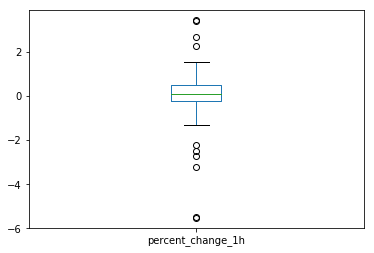

In [7]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)

# Plots
df.percent_change_1h.plot(kind='box')

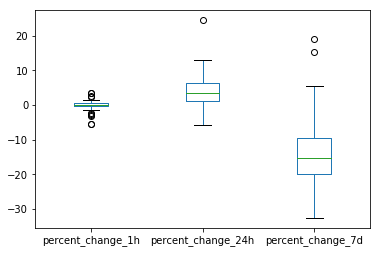

In [9]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)

# Plots
df[['percent_change_1h', 'percent_change_24h', 'percent_change_7d']].plot(kind='box')

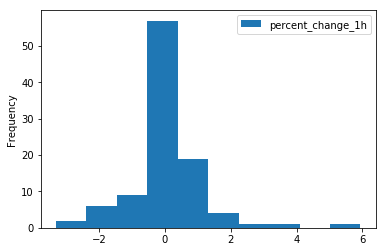

In [15]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)

# Plots
df[['percent_change_1h']].plot(kind='hist')

# Exercício

Objetivos:

- Plotar um gráfico de barras com os preço em bitcoin das 20 primeiras criptomoedas do dataset utilizando o pacote seaborn
- Plotar o gráfico horizontal

*Tempo: 10 minutos*

In [ ]:
import pandas as pd
import requests
import seaborn as sns

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo para o tipo float

# Plot horizontal


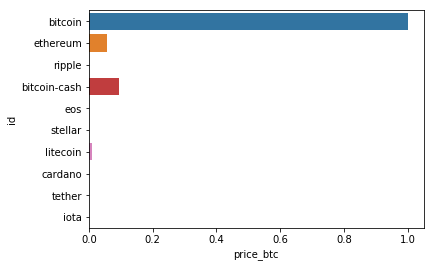

In [7]:
import pandas as pd
import requests
import seaborn as sns

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo para o tipo float
df['price_btc'] = df['price_btc'].astype(float)

# plot horizontal
ay = sns.barplot(x="price_btc", y="id", data=df[:10])

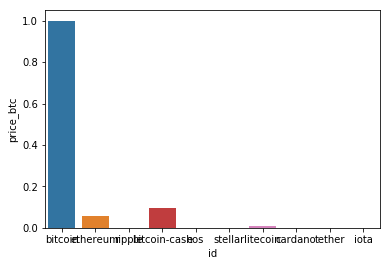

In [16]:
import pandas as pd
import requests
import seaborn as sns

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo para o tipo float
df['price_btc'] = df['price_btc'].astype(float)

# plot horizontal
ay = sns.barplot(x='id', y="price_btc", data=df[:10])

# Outras APIs para estudo

- https://jobs.github.com/api
- http://quotesondesign.com/wp-json/posts?filter[orderby]=rand&filter[posts_per_page]=25
- https://carbon-intensity.github.io/api-definitions/
- http://www.recipepuppy.com/about/api/
- https://app.swaggerhub.com/apis/Bandsintown/PublicAPI/3.0.0

# Dúvidas?

<center>
<img src="https://camo.githubusercontent.com/12c1fa3547b626782c83013c48c6695b2660b795/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f48445233316a7351555071516f2f67697068792e676966" alt="drawing" width="500px"></center>